In [1]:
import graphlab
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = graphlab.SFrame('kc_house_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to sripriya.kuram@gmail.com and will expire on September 13, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\sripr\AppData\Local\Temp\graphlab_server_1478872972.log.0


In [43]:
def get_numpy_data(data_sframe, features, output):
    one_vector = np.ones(len(data_sframe))
    feature_matrix = graphlab.SFrame()
    feature_matrix['constant']=one_vector
    feature_matrix[features] = data_sframe[features]
    output_array = data_sframe[output].to_numpy()
    feature_matrix = feature_matrix.to_numpy()
    return (feature_matrix,output_array)

    

In [44]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix,weights)
    return predictions

In [85]:
def test_errors(presictions,output):
    test_error = ( output - predictions )
    return test_error
#error = output - predictions
def feature_derivative_ridge(errors, feature, weights, l2_penalty, feature_is_constant):
    
    if feature_is_constant is True:
        for i in weights[1:]:
        
            cost_of_fit = 2 * sum (np.dot(errors , feature[i]))
            cost_of_weights = 2 * weights[i] * l2_penalty
            total_cost_wo_constant = cost_of_fit + cost_of_weights
        cost_of_constant = 2 * weights[0] * errors[0] * feature[0]
        derivative = cost_of_constant + total_cost_wo_constant
        
            
    elif feature_is_constant is False:
         for i in weights:
            cost_of_fit = 2 * sum (np.dot(errors * feature[i]))
            cost_of_weights = 2 * weights[i] * l2_penalty
            derivative = cost_of_fit + cost_of_weights
    return derivative
    

In [86]:
(example_features, example_output) = get_numpy_data( sales, ['sqft_living'], 'price' ) 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output


In [98]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
        derivative = 2 * np.dot(errors, feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2 * np.dot(errors, feature) + 2*l2_penalty*weight
    return derivative

In [99]:
print np.sum(errors*example_features[:,1])*2+20

-5.65541667824e+13


In [100]:
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)


-22446749336.0


In [204]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print 'Starting gradient descent with l2_penalty = ' + str(l2_penalty)
    weights = np.array(initial_weights)
    iterations = 1
    print_frequency = 1
    if iterations <= 3:
        
        predictions = predict_output(feature_matrix , weights)
        errors =  predictions - output
        if iterations == 10:
            print_frequency = 10
        if iterations == 100:
            print_frequency = 100
        for i in range(len(weights)):
            if i == 0:
                derivative = feature_derivative_ridge(errors,feature_matrix[:, i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, False)
            weights[i] = weights[i] - step_size * derivative
            print weights
        iterations = iterations + 1
        
    return weights


In [209]:
initial_weights = np.array([0., 4.])
step_size = 1e-12
max_iterations=1000
l2_penalty = 0.0
omlette = ridge_regression_gradient_descent(simple_feature_matrix, train_output, initial_weights, 
                                                              step_size, l2_penalty, max_iterations=100)
omlette

Starting gradient descent with l2_penalty = 0.0
[ 0.01846343  4.        ]
[  1.84634251e-02   5.06126941e+01]


array([  1.84634251e-02,   5.06126941e+01])

In [210]:
initial_weights = np.array([0., 4.])
step_size = 1e-12
max_iterations=1000
l2_penalty = 1e11
omlette = ridge_regression_gradient_descent(simple_feature_matrix, train_output, initial_weights, 
                                                              step_size, l2_penalty, max_iterations=100)
omlette

Starting gradient descent with l2_penalty = 1e+11
[ 0.01846343  4.        ]
[  1.84634251e-02   4.98126941e+01]


array([  1.84634251e-02,   4.98126941e+01])

In [165]:
simple_features = ['sqft_living']
my_output = 'price'

In [166]:
    train_data,test_data = sales.random_split(.8,seed=0)

In [167]:
(simple_feature_matrix, train_output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [168]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [169]:
l2_penalty = 0.0
simple_weights_0_penalty =  ridge_regression_gradient_descent(simple_feature_matrix, train_output, initial_weights, 
                                                              step_size, l2_penalty, max_iterations=100)
simple_weights_0_penalty

Starting gradient descent with l2_penalty = 0.0


array([  7.88199720e-02,   2.63024271e+02])

In [170]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, train_output, initial_weights, 
                                                              step_size, l2_penalty, max_iterations=100)
simple_weights_high_penalty

Starting gradient descent with l2_penalty = 1e+11


array([   0.99807924,  124.57384473])

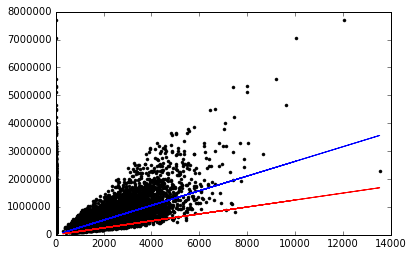

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,train_output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [172]:
-- simple_test_feature_matrix, test_output

sum1 = sum ((test_output - np.dot(simple_test_feature_matrix , initial_weights) )**2)
sum2 = sum ((test_output - np.dot(simple_test_feature_matrix , simple_weights_0_penalty)) ** 2)
sum3 = sum ((test_output - np.dot(simple_test_feature_matrix , simple_weights_high_penalty)) **2 )
sum1 , sum2 , sum3

(1784273282524564.0, 275723643935160.09, 694653089851533.12)

In [174]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(train_feature_matrix, train_output1) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output1) = get_numpy_data(test_data, model_features, my_output)

In [182]:
initial_weights1 = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [183]:
l2_penalty = 0.0
multiple_weights_0_penalty = ridge_regression_gradient_descent(train_feature_matrix, train_output1, initial_weights, step_size, l2_penalty, max_iterations)
multiple_weights_0_penalty

Starting gradient descent with l2_penalty = 0.0


array([  -0.35743482,  243.0541689 ,   22.41481594])

In [184]:

l2_penalty = 1e11
multiple_weights_high_penalty = ridge_regression_gradient_descent(train_feature_matrix, train_output1, initial_weights, step_size, l2_penalty, max_iterations)
multiple_weights_high_penalty

Starting gradient descent with l2_penalty = 1e+11


array([  6.7429658 ,  91.48927361,  78.43658768])

In [187]:
sum4 = sum ((test_output1 - np.dot(test_feature_matrix , initial_weights1) )**2)
sum5 = sum ((test_output1 - np.dot(test_feature_matrix , multiple_weights_0_penalty)) ** 2)
sum6 = sum ((test_output1 - np.dot(test_feature_matrix , multiple_weights_high_penalty)) **2 )
sum4 , sum5 , sum6

(1784273282524564.0, 274067618287244.97, 500404800579555.94)

In [191]:
sum ((test_output1[0] - np.dot(test_feature_matrix[0] , multiple_weights_0_penalty) )**2)

TypeError: 'numpy.float64' object is not iterable

In [194]:
predict_output(test_feature_matrix[0],multiple_weights_0_penalty) - test_output1[0]

77465.476464743959

In [195]:
predict_output(test_feature_matrix[0],multiple_weights_high_penalty) - test_output1[0]

-39546.469695141423

[[  1.00000000e+00   1.43000000e+03   1.78000000e+03]
 [  1.00000000e+00   2.95000000e+03   2.14000000e+03]
 [  1.00000000e+00   1.71000000e+03   1.03000000e+03]
 ..., 
 [  1.00000000e+00   2.52000000e+03   2.52000000e+03]
 [  1.00000000e+00   2.31000000e+03   1.83000000e+03]
 [  1.00000000e+00   1.02000000e+03   1.02000000e+03]]
